<a href="https://colab.research.google.com/github/Preethi3101/PROTEIN-EXPRESSION-ANALYSIS-FOR-DOWN-SYNDROME_MINI-PROJECT/blob/main/PROTEIN_EXPRESSION_ANALYSIS_FOR_DOWN'S_SYNDROME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING LIBRARIES AND LOADING DATASET**

In [ ]:
from sklearn import feature_selection
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,f1_score,roc_auc_score,auc
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
import seaborn as sns
from scipy import interp
from itertools import cycle

mice=pd.read_csv("Data_Cortex_Nuclear.csv")

**THE DATASET CONSISTS OF 1080 ROWS AND 82 COLUMNS **

In [ ]:
mice.shape

(1080, 82)

**OVERVIEW OF THE DATASET**

In [ ]:
mice.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

**VISUALIZING NULL VALUES IN THE DATASET**

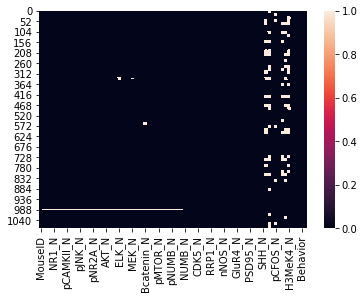

In [ ]:
sns.heatmap(mice.isnull())

**CHECKING FOR NULL VALUES AND FILLING THEM WITH THE MEAN VALUES **

In [ ]:
mice.isnull().sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Length: 1080, dtype: int64

In [ ]:
nmice = mice.fillna(mice.mean())

nmice.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

**IDENTIFYING CATEGORICAL AND NUMERICAL ATTRIBUTES**

In [ ]:
def value_type(mice):
  categorical=[]
  numerical=[]
  for i in mice.columns:
    if mice[i].dtype == 'object':
      categorical.append(i)
    else:
      numerical.append(i)
  return categorical,numerical

category,numerical=value_type(mice)
print('columns with categorical values:',category)
print('columns with numerical values:\n',numerical)

columns with categorical values: ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']
columns with numerical values:
 ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']


**IDENTIFICATION OF VALUES IN THE CATEGORICAL COLUMNS**

**CONTROL--NORMAL MICE**

**TS65DN--TRISOMIC OR DOWN SYNDROME AFFECTED MICE **




In [ ]:
print('values in Genotype column:',mice['Genotype'].nunique())
print('values:',mice['Genotype'].unique())

values in Genotype column: 2
values: ['Control' 'Ts65Dn']


**MEMANTINE--MICE INJECTED WITH THE DRUG MEMANTINE**

**SALINE--MICE INJECTED WITH SALINE WATER **

In [ ]:
print('values in Treatment column:',mice['Treatment'].nunique())
print('values:',mice['Treatment'].unique())

values in Treatment column: 2
values: ['Memantine' 'Saline']


**C/S--SIMULATED TO CONTEXT SHOCK**

**S/C--SIMULATED TO SHOCK CONTEXT **

In [ ]:
print('values in Behavior column:',mice['Behavior'].nunique())
print('values:',mice['Behavior'].unique())

values in Behavior column: 2
values: ['C/S' 'S/C']


C-CS-M-->CONTROL-CONTEXTSHOCK-MEMANTINE

C-SC-M-->CONTROL-SHOCKCONTEXT-MEMANTINE

C-CS-S-->CONTROL-CONTEXTSHOCK-SALINE

C-SC-S-->CONTROL-SHOCKCONTEXT-SALINE

T-CS-M-->TRISOMIC-CONTROLSHOCK-MEMANTINE

T-SC-M-->TRISOMIC-SHOCKCONTEXT-MEMANTINE

T-CS-S-->TRISOMIC-CONTROLSHOCK-SALINE

T-SC-S-->TRISOMIC-SHOCKCONTEXT-SALINE

In [ ]:
print('values in class column:',mice['class'].nunique())
print('values:',mice['class'].unique())

values in class column: 8
values: ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


**ENCODING CATEGORICAL ATTRIBUTES TO NUMERICAL**

In [ ]:
from sklearn import preprocessing
val=preprocessing.LabelEncoder()
nmice['Genotype']= val.fit_transform(nmice['Genotype'])
nmice['Treatment']= val.fit_transform(nmice['Treatment'])
nmice['Behavior']= val.fit_transform(nmice['Behavior'])
nmice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0,0,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0,0,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0,0,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0,0,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.9

**IDENTIFICATION OF NUMBER OF RECORDS IN EACH CLASS**

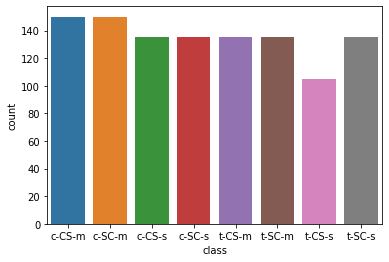

In [ ]:
sns.countplot(x='class',data=mice)

In [ ]:
mice['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-SC-s    135
t-SC-m    135
c-CS-s    135
t-SC-s    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

Control    570
Ts65Dn     510 

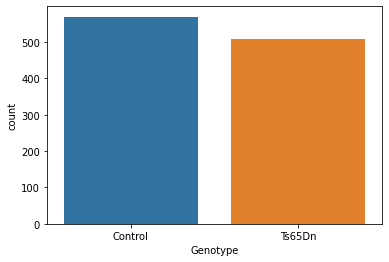

In [ ]:
sns.countplot(x="Genotype",data=mice)


S/C    555
C/S    525

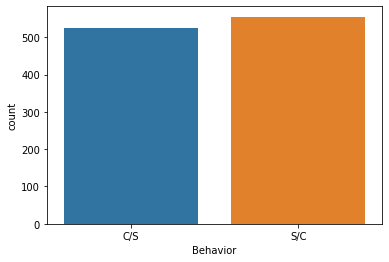

In [ ]:
sns.countplot(x="Behavior",data=mice)

Memantine    570

Saline       510

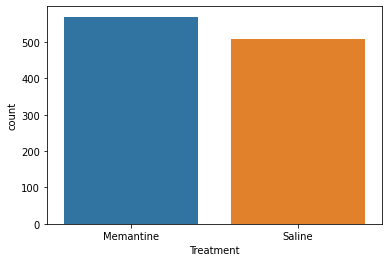

In [ ]:
sns.countplot(x="Treatment",data=mice)


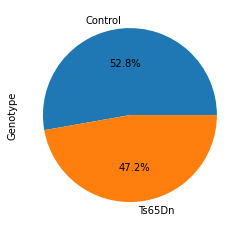

In [ ]:
mice['Genotype'].value_counts().plot(kind='pie',autopct='%1.1f%%');


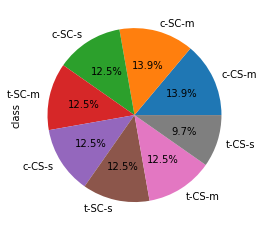

In [ ]:
mice['class'].value_counts().plot(kind='pie',autopct='%1.1f%%');


Text(0.5, 0, 'DYRK1A_N')

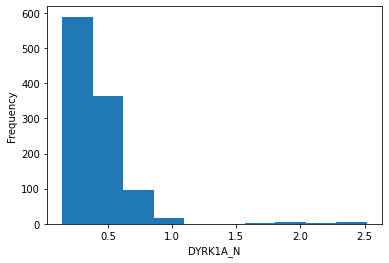

In [ ]:
ax=nmice["DYRK1A_N"].plot.hist()
ax.set_xlabel("DYRK1A_N")


Text(0.5, 0, 'pPKCG_N')

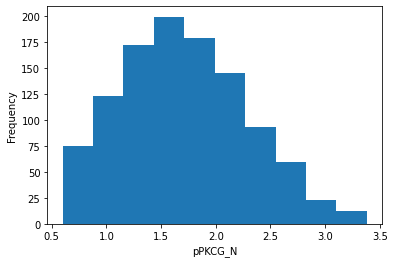

In [ ]:
ax=nmice["pPKCG_N"].plot.hist()
ax.set_xlabel("pPKCG_N")

Text(0.5, 0, 'SOD1_N')

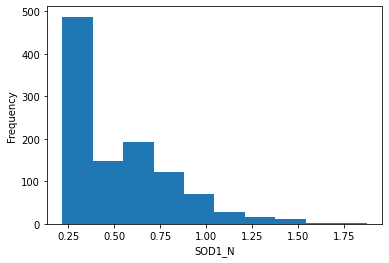

In [ ]:
ax=nmice["SOD1_N"].plot.hist()
ax.set_xlabel("SOD1_N")

Text(0.5, 0, 'SOD1_N')

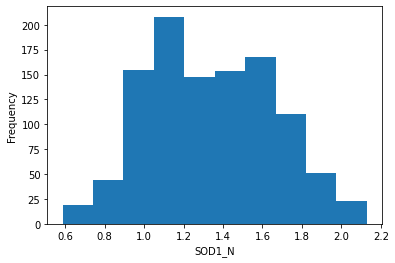

In [ ]:
ax=nmice["CaNA_N"].plot.hist()
ax.set_xlabel("SOD1_N")

Text(0.5, 0, 'Ubiquitin_N')

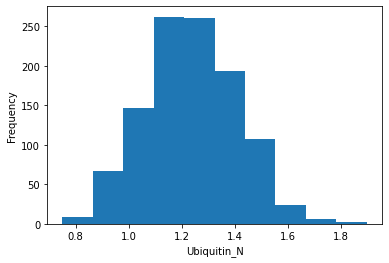

In [ ]:
ax=nmice["Ubiquitin_N"].plot.hist()
ax.set_xlabel("Ubiquitin_N")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


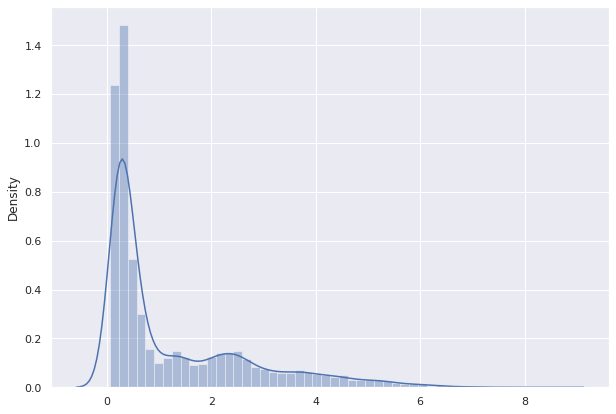

In [ ]:
sns.set(rc={"figure.figsize": (10,7)})
ax = sns.distplot(nmice.loc[:,'DYRK1A_N':'pERK_N'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


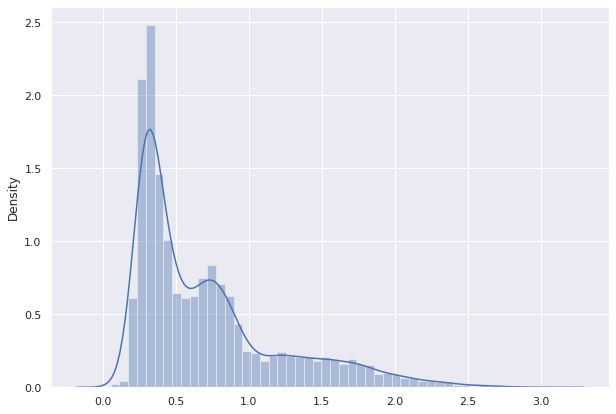

In [ ]:
ax = sns.distplot(nmice.loc[:,'pJNK_N':'BRAF_N'])
plt.show()

**DIVIDING THE DATASET FOR TRAINING AND TESTING**

In [ ]:
X = nmice.drop(['class','Genotype','Treatment','Behavior','MouseID'],axis=1)
y = nmice['class']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


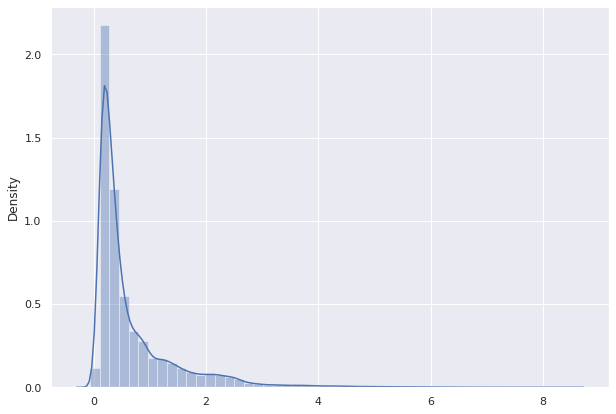

In [ ]:
ax = sns.distplot(X)
plt.show()

**THE PROTEIN VALUES IN THE DATASET ARE NORMALLY DISTRIBUTED**

**IDENTIFICATION OF THE MOST CONTRIBUTING PROTEINS TO THE OUTCOME**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=20)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))

   Feature_Name       Score
32       SOD1_N  292.756964
76       CaNA_N  240.971768
65  Ubiquitin_N  161.163800
53        ARC_N  138.893732
70        pS6_N  138.893732
34        P38_N  134.793298
48         S6_N   98.047339
17     pPKCAB_N   96.209139
45     pGSK3B_N   86.619666
10       pERK_N   85.536800
35      pMTOR_N   85.346501
64       SNCA_N   76.785852
7     pCAMKII_N   74.735241
30        APP_N   74.514174
60       IL1B_N   71.075500
15      pNR2A_N   68.604215
39      pNUMB_N   66.942333
0      DYRK1A_N   62.154393
1       ITSN1_N   61.768682
33       MTOR_N   57.625014


THE PROTEINS CRITICAL TO LEARNING ABILITY ARE AS FOLLOWS


  SOD1_N

  CaNA_N 

  Ubiquitin_N  
        ARC_N  
        pS6_N  
        P38_N  
         S6_N   
     pPKCAB_N   
     pGSK3B_N   
       pERK_N   
      pMTOR_N   
       SNCA_N   
    pCAMKII_N   
        APP_N   
       IL1B_N   
      pNR2A_N   
      pNUMB_N   
     DYRK1A_N   
      ITSN1_N   
       MTOR_N



**TRAIN-TEST SPLITTING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

**DATA STANDARDIZATION**

**STANDARDIZING THE NUMERICAL ATTRIBUTES**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**MODEL BUILDING**

**K-NEAREST NEIGHBOR -- BEFORE HYPERPARAMETER TUNING**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
model_b= KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
model_b.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

**MODEL EVALUATION**

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred2, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  lb.fit(y_pred2)
  y_test = lb.transform(y_test)
  y_pred2 = lb.transform(y_pred2)
  return roc_auc_score(y_test, y_pred2, average=average)

In [ ]:
y_pred = model_b.predict(X_test)
kfold = model_selection.KFold(n_splits=10, random_state = 0)
result = model_selection.cross_val_score(model_b, X_train, y_train, cv=kfold)
print('Accuracy of k-NN Model = ',result.mean())
f1_knn = f1_score(y_test, y_pred,average='macro')
print('f1 score:',f1_knn)
print('confusion matrix for 8  classes:\n',confusion_matrix(y_test,y_pred))

Accuracy of k-NN Model =  0.8690945674044267
f1 score: 0.874367010868508
confusion matrix for 8  classes:
 [[41  0  0  0  3  3  0  3]
 [ 9 34  1  0  0  1  0  0]
 [ 0  0 61  0  0  0  1  0]
 [ 0  0  0 46  0  0  1  0]
 [ 2  0  0  0 39  0  0  0]
 [ 2  2  0  0  4 28  0  0]
 [ 0  0  4  5  0  0 43  0]
 [ 1  0  2  1  0  0  1 40]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
print("roc score:")
multiclass_roc_auc_score(y_test, y_pred)

roc score:


0.9277070362980061

**HYPER PARAMETER TUNING USING GRIDSEARCH CV**

In [ ]:
#making the instance
model = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5,6,7,8,9,10],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1,1,2]}
#Making model with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}


**KNN MODEL WITH BEST HYPER PARAMETERS**

In [ ]:
model_a= KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',leaf_size=1,n_jobs=-1,weights='distance')
model_a.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')

**PREDICTION AND EVALUATION USING K FOLD CROSS VALIDATION**

In [ ]:
y_pred1 = model_a.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
result = model_selection.cross_val_score(model_a, X_train, y_train, cv=kfold)
y_pred1

array(['c-CS-s', 't-CS-s', 'c-SC-s', 'c-SC-m', 'c-CS-s', 'c-CS-s',
       't-SC-m', 't-CS-s', 'c-CS-s', 'c-SC-s', 'c-SC-m', 't-SC-m',
       'c-CS-m', 'c-CS-m', 'c-CS-s', 'c-CS-s', 'c-CS-s', 't-SC-m',
       'c-SC-m', 'c-CS-s', 'c-CS-m', 'c-CS-s', 'c-SC-m', 't-SC-m',
       't-CS-s', 'c-CS-s', 'c-CS-s', 't-SC-m', 't-CS-s', 't-SC-s',
       't-SC-s', 't-CS-m', 't-CS-s', 't-SC-m', 't-CS-m', 't-SC-s',
       't-SC-s', 't-SC-s', 'c-CS-s', 'c-CS-m', 't-CS-m', 't-SC-s',
       't-SC-m', 'c-CS-s', 't-SC-s', 'c-SC-m', 't-SC-m', 't-SC-m',
       't-CS-m', 't-SC-s', 't-CS-s', 'c-SC-m', 'c-CS-s', 't-CS-m',
       'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-SC-s', 't-SC-m',
       't-SC-s', 'c-CS-m', 'c-SC-s', 'c-SC-s', 't-SC-m', 'c-CS-m',
       't-CS-m', 't-SC-m', 't-CS-m', 'c-CS-m', 'c-CS-m', 'c-SC-s',
       'c-SC-m', 'c-SC-m', 't-SC-m', 'c-SC-s', 't-CS-s', 'c-SC-s',
       't-SC-m', 't-CS-s', 't-CS-m', 't-SC-m', 't-SC-s', 't-SC-m',
       'c-SC-m', 'c-CS-s', 't-SC-s', 'c-SC-m', 't-CS-m', 'c-SC

In [ ]:
print('Accuracy of k-NN Model = ',result.mean())
f1_knn = f1_score(y_test, y_pred1,average='macro')
print('f1 score:',f1_knn)
print('confusion matrix for 8  classes:\n',confusion_matrix(y_test,y_pred1))


Accuracy of k-NN Model =  0.9572635814889336
f1 score: 0.9851837817434077
confusion matrix for 8  classes:
 [[49  0  0  0  1  0  0  0]
 [ 0 45  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  1  1]
 [ 0  0  0 46  0  0  1  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0 51  1]
 [ 0  0  0  0  0  0  0 45]]


In [ ]:
print("roc score:")
multiclass_roc_auc_score(y_test, y_pred1)

roc score:


0.9920610034895312

GIVEN THE PROTEIN EXPRESSION VALUES OF THE SPECIFIED 77 PROTEINS, THE K NEAREST NEIGHBOUR MODEL PREDICTS THE TYPE OF MOUSE WHETHER ITS GENOTYPE IS CONTROL OR TRISOMIC, TREATMENT GIVEN IS MEMANTINE OR SALINE AND BEHAVIOR IS CONTEXT SHOCK OR SHOCK CONTEXT WITH AN ACCURACY OF 96.44%.

**PREDICTING FOR UNSEEN DATA**

In [ ]:
new_data1=[['0.503644','2.816329','5.990152','0.218830','0.177565','1.750936','0.687906','0.306382','0.402698','1.022060',
            '1.877684','0.441599','0.859366','0.416289','1.866358','3.685247','0.165846','3.037621','0.369510','0.458539',
            '0.335336','0.576916','0.448099','0.586271','0.394721','0.339571','0.482864','0.114783','0.131790','0.128186', 
            '1.443091','0.294700','0.354605','1.339070','0.188852','0.106305','0.144989','0.176668','0.125190','0.142756',
             '0.430957','1.603310','2.014875','0.108234','0.134762','0.427099','0.114783','0.131790','0.128186','0.9964',
            '0.503644','0.747193','0.430175','2.816329','5.990152','0.218830','0.177565','2.373744','0.232224','1.750936','0.687906',
            '0.306382','0.402698','0.296927','1.022060','0.605673','1.877684','2.308745','0.441599','0.859366','0.416289','0.369608',
            '0.178944','1.866358','3.685247','1.537227','0.264526'	
          ]]
a=model_a.predict(new_data1)
print("the given input data belongs to class:",a)

the given input data belongs to class: ['t-SC-m']


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


In [ ]:
model1=LogisticRegression(C=10, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
model1.fit(X_train, y_train)
y_pred4 = model1.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 15, max_depth=None,criterion = 'entropy', random_state = 0)
model2.fit(X_train, y_train)
y_pred5 = model2.predict(X_test)

**VOTING ENSEMBLE CLASSIFIER**

In [ ]:
models = list()
models.append(('knn',model_a))
models.append(('lr',model1))
models.append(('rf',model2))
ensemble = VotingClassifier(estimators=models, voting='hard')

In [ ]:
ensemble.fit(X_train, y_train)
y_pred6 = ensemble.predict(X_test)
y_pred6

array(['t-CS-m', 't-SC-m', 'c-CS-s', 't-SC-m', 't-SC-s', 't-SC-m',
       'c-CS-m', 't-SC-m', 't-CS-m', 't-CS-m', 'c-CS-s', 'c-SC-m',
       't-SC-m', 't-SC-m', 'c-SC-s', 'c-SC-s', 'c-SC-s', 't-SC-m',
       't-CS-s', 'c-SC-m', 'c-SC-m', 't-SC-s', 't-CS-s', 't-CS-m',
       't-SC-s', 't-CS-s', 'c-CS-s', 't-CS-s', 'c-CS-m', 't-CS-m',
       'c-CS-m', 't-SC-m', 'c-SC-m', 't-CS-m', 't-SC-s', 'c-CS-m',
       't-CS-m', 't-SC-s', 't-CS-m', 'c-SC-s', 't-SC-m', 't-CS-m',
       'c-CS-s', 'c-CS-s', 'c-CS-s', 't-SC-s', 'c-SC-m', 't-CS-s',
       'c-CS-s', 'c-CS-s', 't-CS-m', 't-CS-m', 't-SC-s', 't-CS-m',
       'c-SC-m', 't-CS-s', 't-SC-s', 't-SC-s', 't-CS-m', 'c-CS-s',
       'c-SC-m', 'c-CS-s', 't-SC-s', 'c-CS-m', 't-CS-m', 'c-CS-m',
       't-CS-s', 't-CS-s', 'c-CS-m', 't-SC-s', 'c-SC-s', 't-CS-m',
       'c-CS-s', 't-SC-s', 't-CS-s', 'c-SC-m', 't-SC-m', 'c-CS-m',
       'c-SC-s', 'c-SC-m', 't-CS-s', 'c-CS-m', 'c-CS-s', 't-SC-m',
       't-CS-m', 't-SC-m', 't-CS-s', 'c-SC-m', 'c-CS-m', 'c-CS

In [ ]:
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print('accuracy score of voting classifier:',results.mean())
f1_VC = f1_score(y_test, y_pred6,average='macro')
print('f1 score:',f1_VC)
print('confusion matrix for 8  classes:\n',confusion_matrix(y_test,y_pred6))

accuracy score of voting classifier: 0.9829376257545273
f1 score: 0.9901004997520144
confusion matrix for 8  classes:
 [[55  0  0  0  2  0  0  0]
 [ 1 44  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0]
 [ 0  0  0 48  0  0  0  0]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0 45]]


In [ ]:
print("roc score:")
multiclass_roc_auc_score(y_test, y_pred6)

roc score:


0.9942324785593024